# Histopathologic Cancer Detection_project
### Overview of project:

(https://www.kaggle.com/competitions/histopathologic-cancer-detection/overview). This project related to task: Identify metastatic tissue in histopathologic scans of lymph node sections by san images of sample of tissue. To achive this task need to create and train a CNN model, to predict labels of medical images.
Dataset discription:

The data is from the Kaggle competition "Histopathologic Cancer Detection" (https://www.kaggle.com/competitions/histopathologic-cancer-detection/data). Data represents a large number of small pathology images to classify. A positive label indicates that the center 32x32px region of a patch contains at least one pixel of tumor tissue. Tumor tissue in the outer region of the patch does not influence the label. This outer region is provided to enable fully-convolutional models that do not use zero-padding, to ensure consistent behavior when applied to a whole-slide image.


## Description of Task for this Project:

# Import all packages / libraries for t Project:

In [1]:
!pip install --upgrade pip
!pip install seaborn
!pip install plotly
!pip install scikit-image
import pickle

In [2]:
# Import 
import os

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
import shutil

import matplotlib.pyplot as plt
%matplotlib inline
from tifffile import imread

import cv2
import random

# Model Development
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas_profiling as pp
from tifffile import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Model Development
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas_profiling as pp
from tifffile import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation

from keras.utils import to_categorical
from tqdm import tqdm

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import torch
from torch.utils.data import TensorDataset, DataLoader,Dataset, random_split
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
import torchvision
import torchvision.transforms as transforms
from torch.optim import lr_scheduler

from torch.utils.data.sampler import SubsetRandomSampler
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, CosineAnnealingLR

!pip install torchsummary
from torchsummary import summary

import copy
import time 
from PIL import Image
train_on_gpu = True

torch.manual_seed(0)
import warnings
warnings.filterwarnings("ignore")
import string
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# DataSet:

In [5]:
# Define the paths to the dataset
train_data = "/kaggle/input/histopathologic-cancer-detection/train"
test_data = "/kaggle/input/histopathologic-cancer-detection/test"
labels_imag = "/kaggle/input/histopathologic-cancer-detection/train_labels.csv"


In [7]:
# Load the labels file
labels_df = pd.read_csv(labels_imag)

print(labels_df)

                                              id  label
0       f38a6374c348f90b587e046aac6079959adf3835      0
1       c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2       755db6279dae599ebb4d39a9123cce439965282d      0
3       bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4       068aba587a4950175d04c680d38943fd488d6a9d      0
...                                          ...    ...
220020  53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6      0
220021  d4b854fe38b07fe2831ad73892b3cec877689576      1
220022  3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75      0
220023  f129691c13433f66e1e0671ff1fe80944816f5a2      0
220024  a81f84895ddcd522302ddf34be02eb1b3e5af1cb      1

[220025 rows x 2 columns]


### Data Pre-processing

In [24]:
df=pd.read_csv('../input/histopathologic-cancer-detection/train_labels.csv')
df

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
220020,53e9aa9d46e720bf3c6a7528d1fca3ba6e2e49f6,0
220021,d4b854fe38b07fe2831ad73892b3cec877689576,1
220022,3d046cead1a2a5cbe00b2b4847cfb7ba7cf5fe75,0
220023,f129691c13433f66e1e0671ff1fe80944816f5a2,0


## EDA analysis original data:

In [8]:
# Get the total amount of samples in the dataset
total_samples = len(labels_df)
print(total_samples)

220025


In [9]:
# Check the size - the image dimensions:
image_path = os.path.join(train_data, labels_df["id"][0] + ".tif")
image = Image.open(image_path)
image_width, image_height = image.size

print(image_width)
print(image_height)

96
96


In [10]:
# Count the number of positive and negative samples
positive = labels_df["label"].sum()
negative = total_samples - positive

print('The number of  positive samples:')
print(positive)
print('The number of negative samples:')
print(negative)

The number of  positive samples:
89117
The number of negative samples:
130908


In [11]:
# Calculate the percentage of positive samples
positive_perc = (positive / total_samples) * 100

In [12]:
# Print dataset information
print("Dataset Information:")
print(f"Number of samples: {total_samples}")
print(f"Image dimensions: {image_width}x{image_height}")
print(f"Positive samples: {positive} ({positive_perc:.2f}%)")
print(f"Negative samples: {negative}")

Dataset Information:
Number of samples: 220025
Image dimensions: 96x96
Positive samples: 89117 (40.50%)
Negative samples: 130908


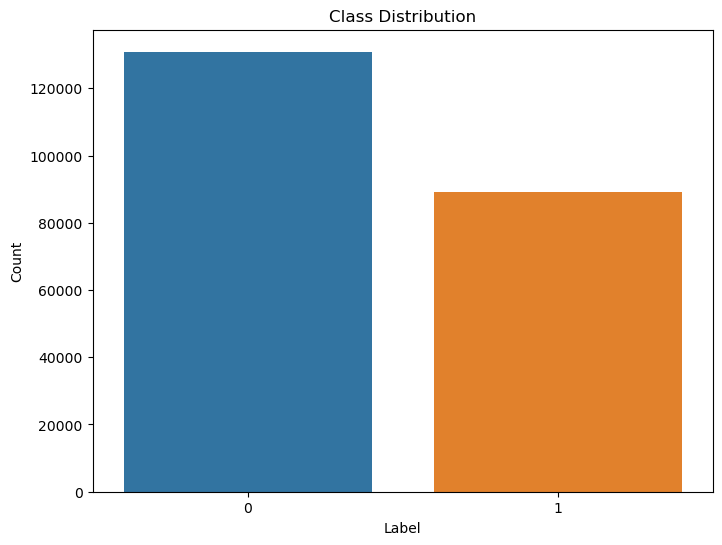

In [13]:
# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="label", data=labels_df)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()



# Visualizations:

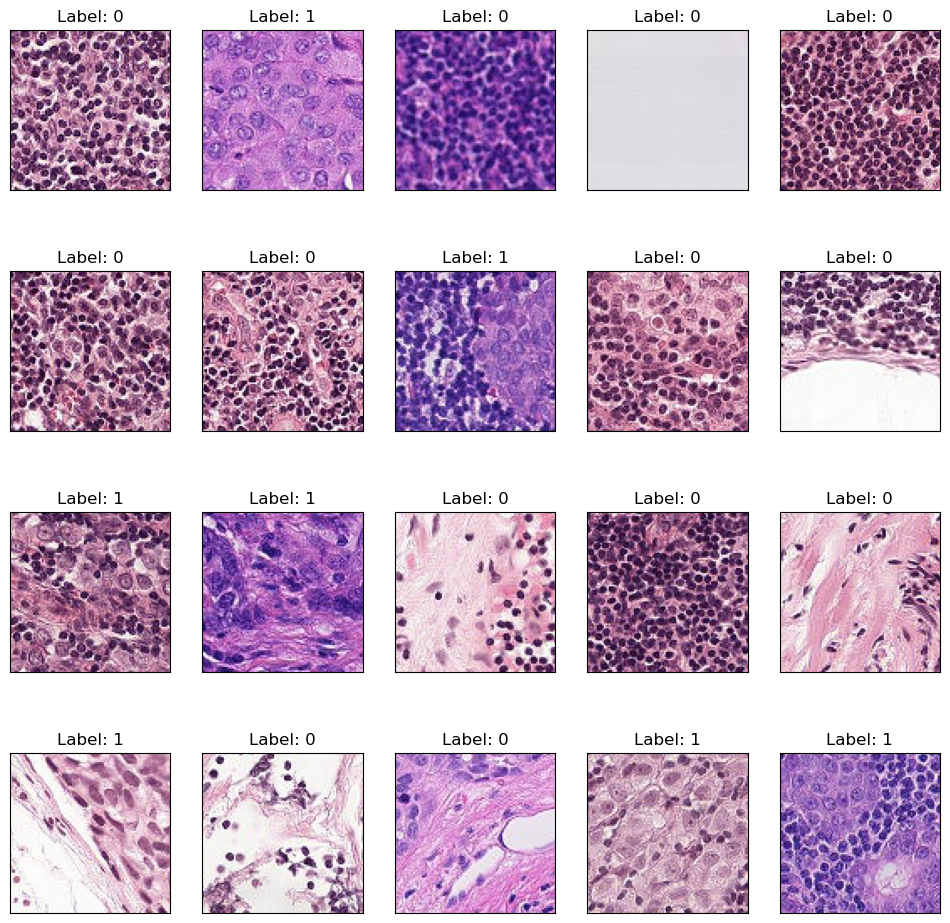

In [16]:
fig = plt.figure(figsize=(12, 12))
paths = "/kaggle/input/histopathologic-cancer-detection/train"
train_imgs = os.listdir(paths)
for idx, img in enumerate(np.random.choice(train_imgs, 20)):
    ax = fig.add_subplot(4, 20//4, idx+1)
    im = Image.open(paths + "/" + img)
    plt.imshow(im)
    plt.xticks([])
    plt.yticks([])
    
    lab = labels_df.loc[labels_df["id"] == img.split('.')[0], 'label'].values[0]
    ax.set_title(f'Label: {["1" if lab == 1 else "0"][0]}')

## Fine-Tune ViT for Image Classification with Transformers


### Loading ViT Feature Extractor

When ViT models are trained, specific transformations are applied to images fed into them. Use the wrong transformations on your image, and the model won't understand what it's seeing.


In [28]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor(do_resize=False).from_pretrained(model_name_or_path)

## Training and Validation Sets

In [31]:
train, valid = train_test_split(train_data, test_size=0.2, random_state=1, stratify=train_data.label)

print(train.shape)
print(valid.shape)

AttributeError: 'str' object has no attribute 'label'

In [35]:
# Get the labels
Y = labels_df["label"]

In [36]:
# Count the number of labels
Y.value_counts()

0    130908
1     89117
Name: label, dtype: int64

In [40]:
crop_dim = (32,32) # (x,y)
img_dim = (96,96) # (x,y)

## CNN Model Definition

In [41]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

#height, width = crop_dim
height, width = img_dim

# Initialising the CNN
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (height,width,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.20))

classifier.add(Conv2D(64, (3, 3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.20))

classifier.add(Conv2D(128, (3, 3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.20))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 2, activation = 'softmax')) #softmax for classification

In [42]:
# Compiling the CNN
from keras import optimizers
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])



In [44]:
# Not used at the moment
if 0:
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
    history = classifier.fit_generator(generator=train_generator_crops,
                             steps_per_epoch=STEP_SIZE_TRAIN,
                             validation_data=valid_generator_crops,
                             validation_steps=STEP_SIZE_VALID,
                             epochs=10,
                             verbose=2)

In [49]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history = classifier.fit_generator(generator=train_generator,
                         steps_per_epoch=STEP_SIZE_TRAIN,
                         validation_data=valid_generator,
                         validation_steps=STEP_SIZE_VALID,
                         epochs=20,
                         verbose=2)



NameError: name 'train_generator' is not defined

## CNN Model Evaluation

NameError: name 'history' is not defined

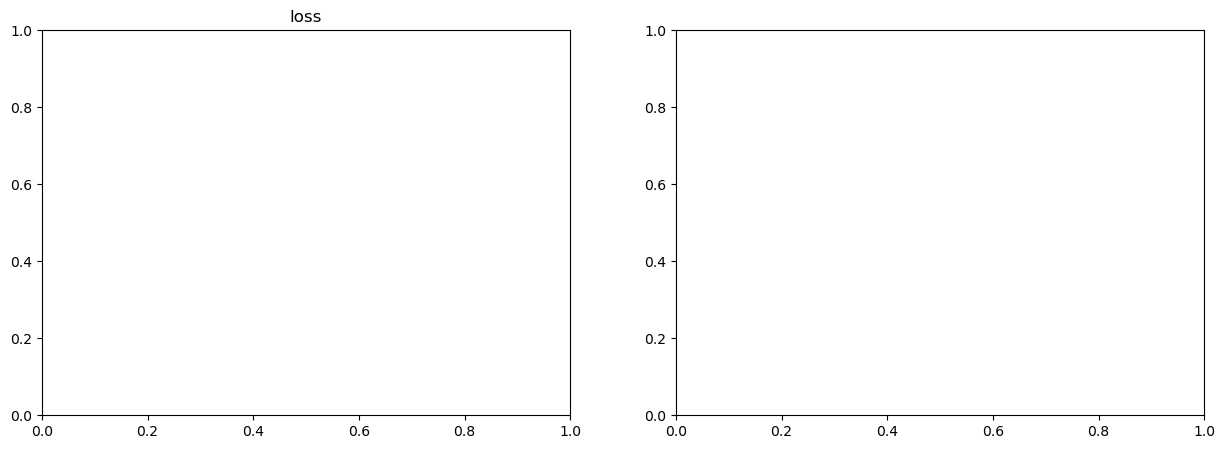

In [50]:
# Display model performance over epochs
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].set_title('loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[0].legend()
ax[1].set_title('acc')
ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
ax[1].legend()

In [ ]:
# Not used at the moment
if 0:
    score = classifier.evaluate_generator(generator=valid_generator_crops, steps=STEP_SIZE_VALID, workers=1)
    print('Score: ',score)
    print('Metrics: ',classifier.metrics_names)
    classifier.summary()

In [ ]:
score = classifier.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID, workers=1)
print('Score: ',score)
print('Metrics: ',classifier.metrics_names)
classifier.summary()

## Create Submission on Challenge Test Set

In [ ]:
df_test.isnull().values.any()

In [ ]:
test_datagen=ImageDataGenerator(rescale=1/255.0)

test_generator=test_datagen.flow_from_dataframe(
        dataframe=df_test,
        directory="../input/test/",
        x_col="id",
        y_col=None,
        batch_size=1,
        seed=42,
        shuffle=False,
        class_mode=None,
        target_size=img_dim)

In [ ]:
def crop_generator_single(batches):
    while True:
        batch_x = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_dim[0], crop_dim[1], 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = crop_center(batch_x[i],crop_dim,img_dim)
        yield (batch_crops)
        
if 0:
    test_generator_crops = crop_generator_single(test_generator)

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()

if 0:
    pred=classifier.predict_generator(test_generator_crops,
                                      steps=STEP_SIZE_TEST,
                                      verbose=1)

    
pred=classifier.predict_generator(test_generator,
                                  steps=STEP_SIZE_TEST,
                                  verbose=1)

In [ ]:
print(pred.shape)

In [ ]:


print(pred[:5,:])



In [ ]:


predicted_class_indices=np.argmax(pred,axis=1)


labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames



In [ ]:


print(labels)



In [ ]:


print(predictions[:5])
print(len(predictions))
# Display the histogram of labels
import seaborn as sns
g = sns.countplot(predictions)

